In [2]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import r2_score

    label            x           y  \
1    head  1315.401302  795.380784   
15   head  1314.013015  795.380784   
18   head  1340.390456  807.180270   
28   head  1338.308026  797.463046   
35   head  1354.273319  798.157134   
49   head  1356.355748  802.321658   
52   head  1379.262473  805.792095   
66   head  1397.310195  807.180270   
70   head  1389.674620  801.627571   
85   head  1383.427332  803.709833   
86   head  1393.839479  810.650707   
95   head  1362.603037  802.321658   
112  head  1339.002169  794.686697   
118  head  1409.110629  787.051735   
123  head  1441.041215  803.709833   
130  head  1454.924078  804.403920   
139  head  1458.394794  803.015746   
147  head  1463.253796  800.239396   
156  head  1470.195228  803.709833   
168  head  1495.184382  793.992609   
173  head  1498.655098  794.686697   
189  head  1496.572668  791.910347   
196  head  1516.702820  785.663560   
206  head  1527.114967  786.357648   
210  head  1533.362256  786.357648   
223  head  1

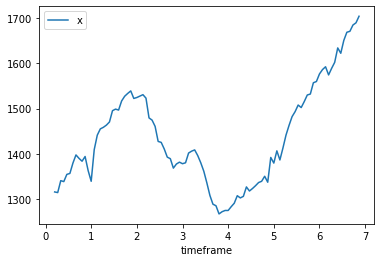

    label            x           y  \
4    head  1159.219089  555.226542   
16   head  1171.713666  560.085154   
20   head  1161.995662  565.637853   
25   head  1175.184382  580.907776   
40   head  1185.596529  585.766388   
47   head  1178.655098  584.378213   
53   head  1168.937093  582.990039   
60   head  1178.655098  578.825514   
73   head  1177.960954  576.049165   
82   head  1175.184382  582.295951   
87   head  1196.008677  582.295951   
100  head  1173.101952  580.907776   
108  head  1193.926247  584.378213   
117  head  1187.678959  573.272815   
128  head  1184.902386  574.660990   
132  head  1211.279826  566.331941   
144  head  1237.657267  564.249679   
149  head  1223.080260  572.578728   
159  head  1215.444685  568.414203   
169  head  1223.774403  592.013175   
178  head  1220.303688  594.095437   
187  head  1225.856833  597.565874   
192  head  1217.527115  595.483612   
201  head  1224.468547  573.966902   
212  head  1220.303688  555.226542   
218  head  1

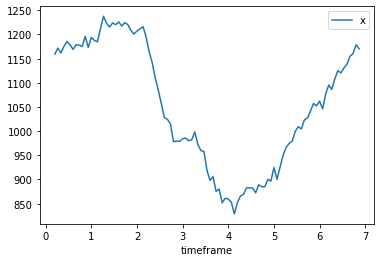

    label            x           y  \
6    head   977.353579  387.951478   
10   head   984.295011  396.974614   
23   head   976.659436  391.421915   
30   head   966.247289  392.810090   
38   head   974.577007  403.221401   
44   head   956.529284  405.303663   
55   head   984.989154  399.750964   
63   head   996.095445  408.774100   
76   head   967.635575  415.020887   
80   head   981.518438  424.044023   
90   head   978.047722  412.244537   
97   head   990.542299  417.103149   
106  head   979.436009  408.080013   
114  head   980.130152  403.221401   
125  head   983.600868  407.385925   
134  head   982.906725  405.303663   
142  head   996.789588  407.385925   
151  head   982.212581  411.550450   
163  head   973.188720  404.609576   
166  head   995.401302  401.139139   
180  head   990.542299  410.856362   
184  head  1005.813449  405.997751   
193  head  1005.119306  410.162275   
203  head  1007.895879  416.409062   
214  head  1008.590022  401.139139   
224  head   

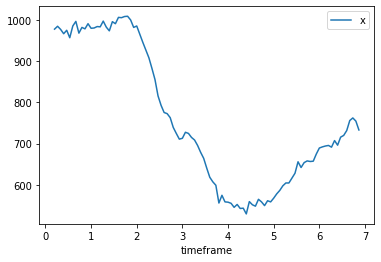

In [2]:
df = pd.read_csv("../12_labels/centroid_labels_video_3.csv")
df[['sid','label']] = df['label'].str.split('_',1,expand=True)
for swimmer_id in [1,2,3]:
    tdf = df[df['sid'] == f"s{swimmer_id}"]
    tdf = tdf[tdf['label'] == 'head']
    print(tdf)
    tdf.plot(x="timeframe",y="x")
    plt.show()

In [22]:
df = pd.read_csv("../test.csv").drop("Unnamed: 0", axis=1)
df = df.head(1000)
unique_images = pd.DataFrame(df['full_image_path'].unique(), columns=["full_image_path"])
unique_swimmers = pd.DataFrame(df['swimmer_id'].unique(), columns=["swimmer_id"])
product = unique_images.merge(unique_swimmers, how = "cross")
df = df.merge(product, how = "right", on=['full_image_path',"swimmer_id"])
null_coords = df['coords'].isnull()
df.loc[null_coords, 'coords'] = [[[0,0],[0,0],[0,0],[0,0]]]*(null_coords.sum())
df['img_time'] = df.groupby('full_image_path')['img_time'].apply(lambda x: x.bfill().ffill())
df.drop('coords', axis=1, inplace=True)
df.head()


,full_image_path,swimmer_id,img_time
0,./12_labels/full_images/2021_Nice_freestyle_50...,1.0,0.000000
1,./12_labels/full_images/2021_Nice_freestyle_50...,2.0,0.000000
2,./12_labels/full_images/2021_Nice_freestyle_50...,3.0,0.000000
3,./12_labels/full_images/2021_Nice_freestyle_50...,1.0,3.333333
4,./12_labels/full_images/2021_Nice_freestyle_50...,2.0,3.333333


In [34]:
df['coords'] = [[[1,2],[0,0]]]*len(df)
df = df.sort_values(['swimmer_id','img_time'])
new_coords_arr = np.zeros((len(df),4,2))
for grp_name, group in df.groupby(['swimmer_id']):
    arr_values = np.array(group['coords'].values.tolist())
    time = group['img_time'].values
    x_head = arr_values[:,0,0]
    x_head[5] = 2
    x_head[8:12] = 0
    x_head[20:22] = 0
    x_head[19] = -1
    coords = np.vstack((time,x_head)).T
    non_zero_ind = np.where(x_head != 0)[0]
    coords = coords[non_zero_ind]
    mymodel = np.poly1d(np.polyfit(coords[:,0], coords[:,1], 3))
    print(r2_score(coords[:,1], mymodel(coords[:,0])))
    preds = mymodel(time)-0.5
    print(x_head)
    ok_array = np.where(x_head == 0,preds, x_head)
    new_coords_arr[group.index,0,1] = ok_array
print(new_coords_arr)

0.015299572283641316
[ 1  1  1  1  1  2  1  1  0  0  0  0  1  1  1  1  1  1  1 -1  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
0.015299572283641316
[ 1  1  1  1  1  2  1  1  0  0  0  0  1  1  1  1  1  1  1 -1  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
0.015299572283641316
[ 1  1  1  1  1  2  1  1  0  0  0  0  1  1  1  1  1  1  1 -1  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 

In [11]:
txt = "[[ 967.5606837  1072.36004639]\n [   0.            0.        ]\n [ 921.94493862 1066.27998454]\n [ 870.24710967 1090.6       ]]"
np.load(txt.replace("\n ",""))

array('[[ 967.5606837  1072.36004639][   0.            0.        ][ 921.94493862 1066.27998454][ 870.24710967 1090.6       ]]',
      dtype='<U118')